In [2]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go
import plotly.io as pio
import chart_studio.plotly as py

In [ ]:
df_one = pd.read_csv('cbs.csv', delimiter=';')

In [5]:
df_two = pd.read_csv('cbs_two.csv', delimiter=';')

In [287]:
df_macro = pd.read_csv('cbs_total.csv', delimiter=';')

In [35]:
df_pyr = pd.read_csv('pyramid.csv', delimiter=';')

In [54]:
df_mig = pd.read_csv('mig.csv', delimiter=';')

In [55]:
df_mig2 = pd.read_csv('mig2.csv', delimiter=';')

In [ ]:
df_now = df_mig[df_mig['Generation'] == 'Total']
df_now = df_now[1:7]

df_past = df_mig2[df_mig2['Generation'] == 'Total'][1:7]

In [9]:
df = df[df['ISO3_code'] == 'NLD']
df_forecast = df
df = df[df['Time'] <= 2022]

In [4]:
NN = df_one[df_one.Regions == 'Noord-Nederland (LD)']
ON = df_one[df_one.Regions == 'Oost-Nederland (LD)']
WN = df_one[df_one.Regions == 'West-Nederland (LD)']
ZN = df_one[df_one.Regions == 'Zuid-Nederland (LD)']

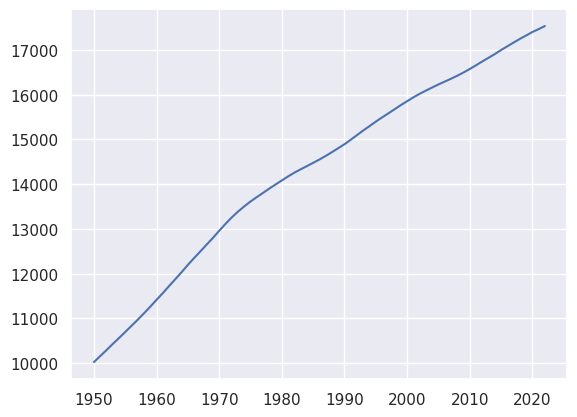

In [11]:
plt.plot(df['Time'], df['TPopulation1Jan'])

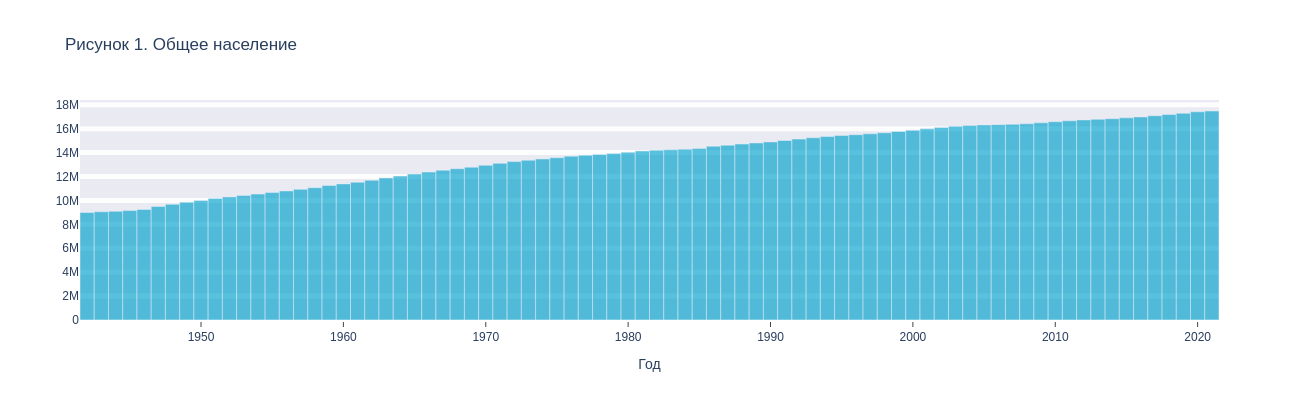

In [6]:
trace = go.Bar(
    x=df_one['Periods'].unique(), 
    y=df_one.groupby('Periods')['Population on 1 January (number)'].sum(),
    width = 1,
    marker=dict(
        color='rgba(0, 161, 205, 0.65)',
        opacity=1
                 ),   
)

layout = go.Layout(
    title='Рисунок 1. Общее население',
    xaxis=dict(
               title='Год',
               showgrid=False,
               linewidth=2,
               ticks='outside',
               gridwidth=5,
               gridcolor='rgba(255, 255, 255, 0.9)'
               ),
    yaxis=dict(
               showline=False,
               gridwidth=5,
               gridcolor='rgba(255, 255, 255, 0.9)',
               nticks=10
               ),
    )


fig = go.Figure(trace, layout)

fig.update_layout(
    autosize=False,
    width=750,
    height=400,
    barmode='group',
    plot_bgcolor='#eaeaf2'
    
    )

fig.show()
# fig.write_image("gen_pop.svg")

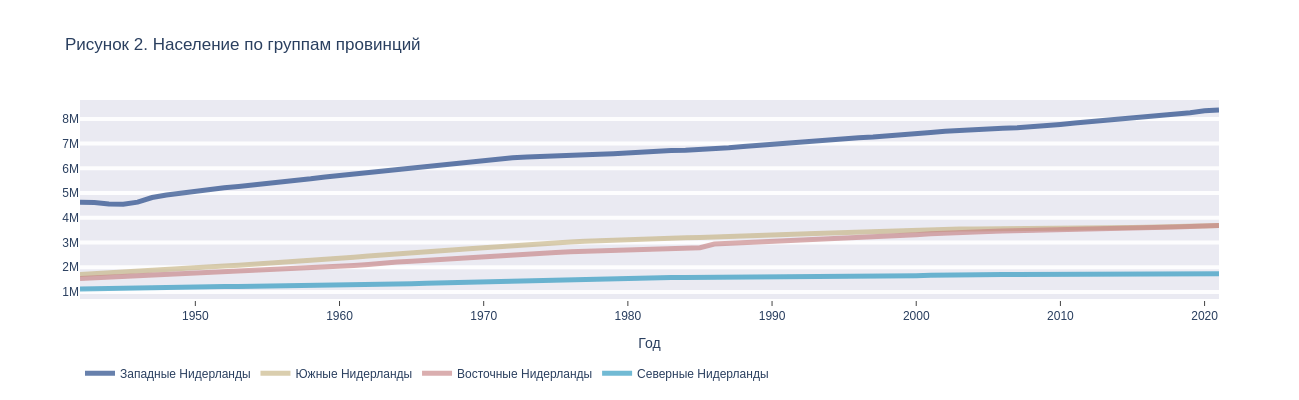

In [32]:
fig = go.Figure()

fig.add_trace(go.Scatter(
    x=WN['Periods'], 
    y=WN['Population on 1 January (number)'],
    name = 'Западные Нидерланды',
    line = dict(
                width=5, 
                color='rgba(22, 60, 128, 0.65)'
               ),
    mode = 'lines',
    marker=dict(
        color='#83a3c7',
        opacity=0.65
                     ),   
    ))

fig.add_trace(go.Scatter(
    x=ZN['Periods'], 
    y=ZN['Population on 1 January (number)'],
    name = 'Южные Нидерланды',
    line = dict(
                width=5, 
                color='rgba(199, 180, 131, 0.65)'
               ),
    mode = 'lines',
    marker=dict(
        color='#c7b483',
        opacity=0.65
                     ),   
    ))

fig.add_trace(go.Scatter(
    x=ON['Periods'], 
    y=ON['Population on 1 January (number)'],
    name = 'Восточные Нидерланды',
    line = dict(width=5,
                color='rgba(199, 131, 132, 0.65)'
               ),
    mode = 'lines',
    marker=dict(
        color='#c78384',
        opacity=0.65
        ),
    ))

fig.add_trace(go.Scatter(
    x=NN['Periods'], 
    y=NN['Population on 1 January (number)'],
    name = 'Северные Нидерланды',
    line = dict(
                width=5,
                color='rgba(37, 150, 190, 0.65)'
               ),
    mode = 'lines',
    marker=dict(
        color='#87b9c9',
        opacity=0.65
                     ),
    ))


fig.update_layout(
    autosize=False,
    width=750,
    height=400,
    title='Рисунок 2. Население по группам провинций',
    xaxis=dict(
               title='Год',
               showgrid=False,
               linewidth=2,
               ticks='outside',
               gridwidth=4,
               gridcolor='rgba(255, 255, 255, 0.9)',
              ),
    yaxis=dict(
               showline=False,
               gridwidth=4,
               gridcolor='rgba(255, 255, 255, 0.9)',
               nticks=14
              ),
    plot_bgcolor='#eaeaf2',
    barmode='group',
    legend=dict(
                orientation="h",
                x=0,
                y=-0.3
               )
    
    )

fig.show()
fig.write_image("group_pop.svg")

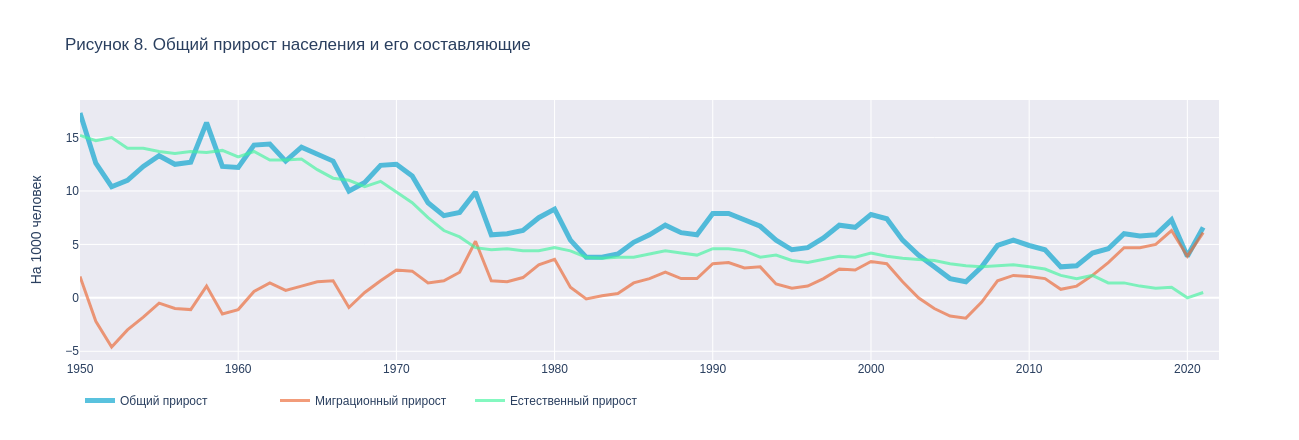

In [314]:
fig = go.Figure()

fig.add_trace(go.Scatter(
    x=df_two['Periods'], 
    y=df_two['Population growth/Total population growth, rate (o/oo)'],
    name = 'Общий прирост',
    line = dict(
                width=5, 
                color='rgba(0, 161, 205, 0.65)'
               ),
    mode = 'lines',
    marker=dict(
                color='#87b9c9',
                opacity=0.65
               ),
    ))

fig.add_trace(go.Scatter(
    x=df_two['Periods'], 
    y=df_two['Population growth/Net migration (including admin..), rate (o/oo)'],
    name='Миграционный прирост',
    line=dict(
              width=3,
              color='rgba(235, 103, 52, 0.65)'
             ),
    mode='lines',
    marker=dict(
                color='#87b9c9',
                opacity=0.65
               ),
    ))

fig.add_trace(go.Scatter(
    x=df_two['Periods'], 
    y=df_two['Population growth/Natural increase, rate (o/oo)'],
    name='Естественный прирост',
    line=dict(
              width=3, 
              color='rgba(66, 245, 158, 0.65)'
             ),
    mode='lines',
    marker=dict(
                color='#87b9c9',
                opacity=0.65
               ),
    ))



layout = go.Layout(
    title='Общий прирост населения',
    xaxis=dict(
               title='Год',
               showgrid=False,
               linewidth=2,
               ticks='outside',
               gridwidth=5,
               gridcolor='rgba(255, 255, 255, 0.9)'
              ),
    yaxis=dict(
               showline=False,
               gridwidth=5,
               gridcolor='rgba(255, 255, 255, 0.9)',
               nticks=10
              ),
    )


fig.update_layout(
    title='Рисунок 8. Общий прирост населения и его составляющие',
    autosize=False,
    width=750,
    height=440,
    barmode='group',
    plot_bgcolor='#eaeaf2',
    legend=dict(
                font=dict(size=12),
                orientation="h",
                entrywidth=150
    
               )
    
    )

fig.update_yaxes(title_text="На 1000 человек")

fig.show()
fig.write_image("gen_pop.svg")

In [36]:
df_pyr['Women'] = df_pyr['Women'].astype(str).apply(lambda x: x.replace(' ', '')).astype(int)
df_pyr['Men'] = df_pyr['Men'].astype(str).apply(lambda x: x.replace(' ', '')).astype(int)
df_pyr['Men'] = -1 * df_pyr['Men']

In [37]:
women_bins = df_pyr['Women']
men_bins = df_pyr['Men']
y = list(range(0, 106, 1))

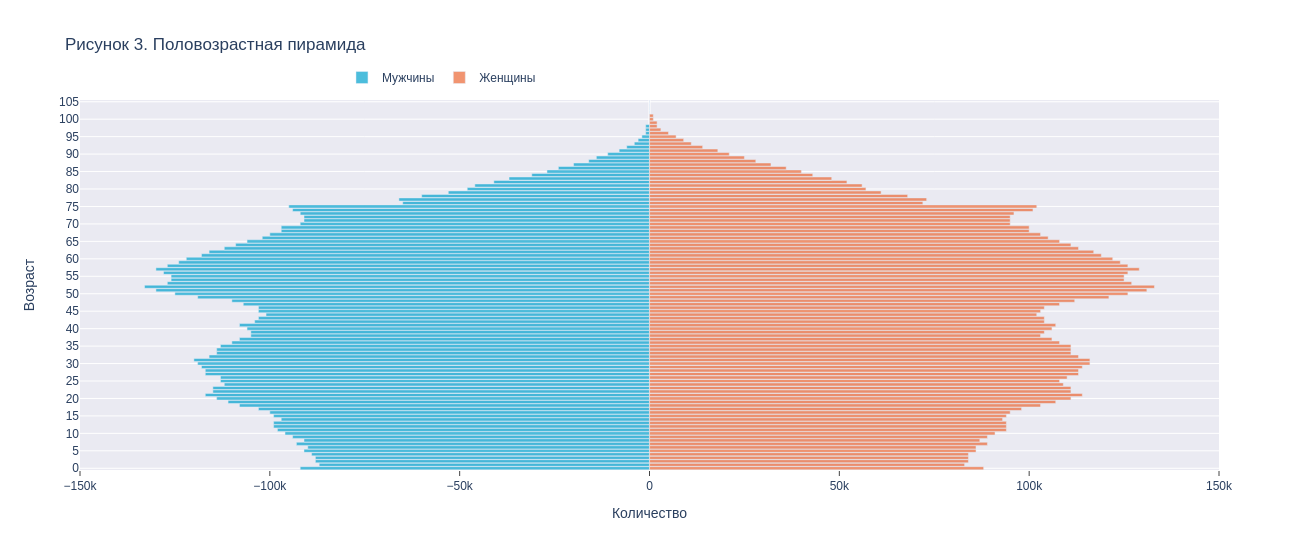

In [53]:
layout = go.Layout(yaxis=go.layout.YAxis(
                                         title='Возраст', 
                                         showgrid=True, 
                                         nticks=22
                                        ),
                   xaxis=go.layout.XAxis(
                                         range=[-150000, 150000],
                                         title='Количество',
                                         showgrid=False,
                                         ticks='outside'
                                        ),
                   barmode='overlay',
                   bargap=0.1,
                   autosize=False,
                   width=550,
                   height=550,
                   plot_bgcolor='#eaeaf2',
                   title = 'Рисунок 3. Половозрастная пирамида',
                   legend=dict(
                               orientation="h",
                               x=0.23,
                               y=1.1
                              )
                  )

data = [go.Bar(
               y=y,
               x=men_bins[::-1],
               orientation='h',
               name='Мужчины',
               marker=dict(color='rgba(0, 161, 205, 0.70)')
              ),
        go.Bar(
               y=y,
               x=women_bins[::-1],
               orientation='h',
               name='Женщины',
               marker=dict(color='rgba(235, 103, 52, 0.70)')
               )
       ]


fig = go.Figure(dict(data=data, layout=layout))
fig.show()
fig.write_image("pyramid.svg")

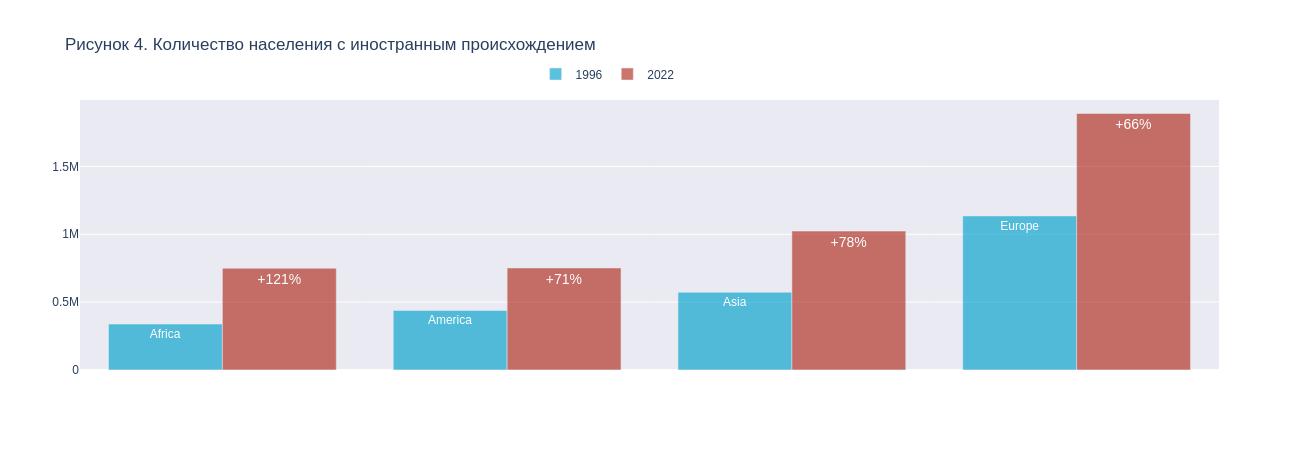

In [167]:
months = ['Africa', 'America', 'Asia', 'Europe']
increase = df_now['Population (number)'] / df_past['Population (number)']
increase = [('+' + str(int(x*100)-100) + '%') for x in increase]

fig = go.Figure()
fig.add_trace(go.Bar(
    x=months,
    y=df_past.groupby('Migration background')['Population (number)'].sum(),
    name='1996',
    marker_color='rgba(0, 161, 205, 0.65)',
    text=months,
    textfont = dict(color = "white", size=12)
    ))
fig.add_trace(go.Bar(
    x=months,
    y=df_now.groupby('Migration background')['Population (number)'].sum(),
    name='2022',
    marker_color='rgba(176, 44, 28, 0.65)',
    text=increase,
    textfont = dict(color = "white", size=14)
    ))

fig.update_layout(
    autosize=False,
    title='Рисунок 4. Количество населения c иностранным происхождением',
    width=850,
    height=450,
    barmode='group',
    plot_bgcolor='#eaeaf2',
    xaxis=dict(showticklabels=False),
    legend=dict(
                orientation="h",
                x=0.40,
                y=1.15
               )
    )


fig.update_layout(barmode='group')
fig.show()
# fig.write_image("mig.svg")

In [184]:
df = pd.read_csv('urb.csv')
df = df[df['Time'] >= 1962]
df = df[:62]

df_h = pd.read_csv('house.csv', delimiter=';')
df_h = df_h[df_h['Periods'] >= 1962]

In [196]:
from plotly.subplots import make_subplots

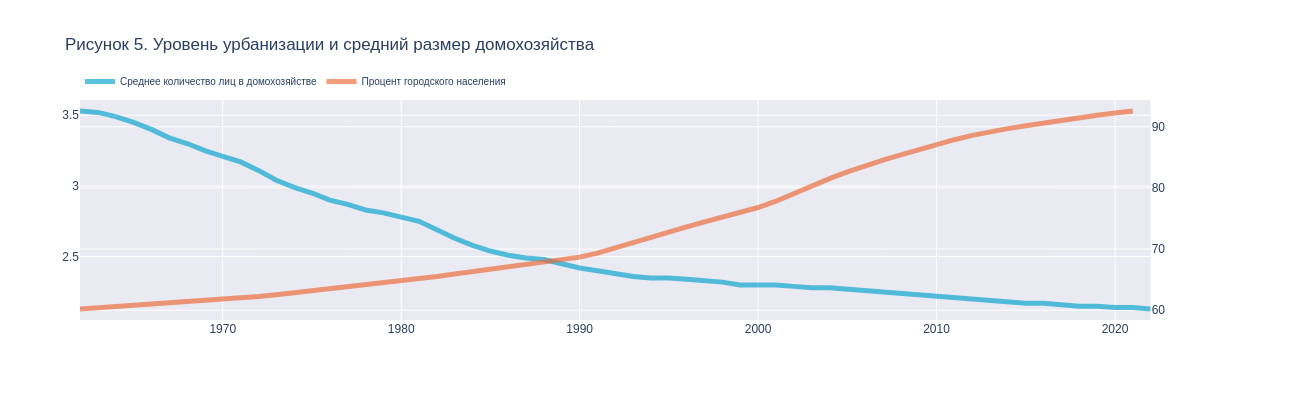

In [244]:
fig = make_subplots(specs=[[{"secondary_y": True}]])

fig.add_trace(go.Scatter(
    x=df_h['Periods'], 
    y=df_h['Private households/Average household size (number)'],
    name = 'Среднее количество лиц в домохозяйстве',
    line = dict(width=5, color='rgba(0, 161, 205, 0.65)'),
    mode = 'lines',
    marker=dict(
                color='#87b9c9',
                opacity=0.65
               ),
    ), 
    secondary_y=False
    )

fig.add_trace(go.Scatter(
    x=df['Time'], 
    y=df['Netherlands [NLD]'],
    name = 'Процент городского населения',
    line = dict(width=5, color='rgba(235, 103, 52, 0.65)'),
    mode = 'lines',
    marker=dict(
                color='#87b9c9',
                opacity=0.65
               ),
    ),
    secondary_y=True
    )




layout = go.Layout(
    xaxis=dict(
               title='Год',
               showgrid=False,
               showline=False,
               linewidth=0,
               ticks='outside',
               gridwidth=0,
               gridcolor='rgba(255, 255, 255, 0.9)'
              ),
    yaxis=dict(
               showline=False,
               showgrid=False,
               gridwidth=0,
               linewidth=0,
               gridcolor='rgba(255, 255, 255, 0.9)'
              ),
    )


fig.update_layout(
                  title_text='Рисунок 5. Уровень урбанизации и средний размер домохозяйства',
                  autosize=False,
                  width=750,
                  height=400,
                  plot_bgcolor='#eaeaf2',
                  legend=dict(
                              orientation="h",
                              x=0,
                              y=1.15,
                              font=dict(size=10)
    
                             )
    
                 )


fig.show()
# fig.write_image("urb.svg")

In [245]:
df = pd.read_csv('cbs_total.csv', delimiter=';')

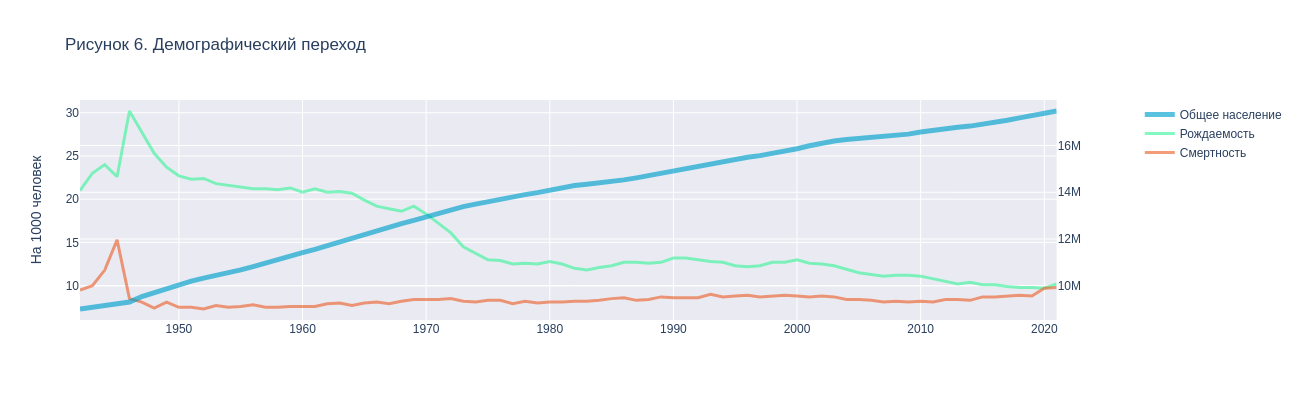

In [257]:
fig = make_subplots(specs=[[{"secondary_y": True}]])

fig.add_trace(go.Scatter(
    x=df['Periods'], 
    y=df['Population on 1 January (number)'],
    name = 'Общее население',
    line = dict(width=5, color='rgba(0, 161, 205, 0.65)'),
    mode = 'lines',
    marker=dict(color='#87b9c9',opacity=0.65),
    ), 
    secondary_y=True
    )

fig.add_trace(go.Scatter(
    x=df['Periods'], 
    y=df['Live born children/Live born children, ratio (per 1,000)'],
    name = 'Рождаемость',
    line = dict(width=3, color='rgba(66, 245, 158, 0.65)'),
    mode = 'lines',
    marker=dict(color='#87b9c9', opacity=0.65),
    ))

fig.add_trace(go.Scatter(
    x=df['Periods'], 
    y=df['Deaths/Deaths, ratio (per 1,000)'],
    name = 'Смертность',
    line = dict(width=3, color='rgba(235, 103, 52, 0.65)'),
    mode = 'lines',
    marker=dict(color='#87b9c9',opacity=0.65),
    ))





layout = go.Layout(
    xaxis=dict(
               title='Год',
               showgrid=False,
               linewidth=2,
               ticks='outside',
               gridwidth=5,
               gridcolor='rgba(255, 255, 255, 0.9)'
              ),
    yaxis=dict(
               showline=False,
               gridwidth=5,
               gridcolor='rgba(255, 255, 255, 0.9)',
               nticks=10
              ),
    )


fig.update_layout(
    title_text='Рисунок 6. Демографический переход',
    autosize=False,
    width=700,
    height=400,
    barmode='group',
    plot_bgcolor='#eaeaf2'  
    )

fig.update_yaxes(title_text="На 1000 человек", secondary_y=False)

fig.show()
fig.write_image("transition.svg")

In [271]:
df = pd.read_csv('wpp.csv', low_memory=False)

In [275]:
df = df[(df['ISO3_code'] == 'NLD') | (df['ISO3_code'] == 'DEU') | (df['ISO3_code'] == 'BEL')]
df = df[df['Time'] <= 2022]

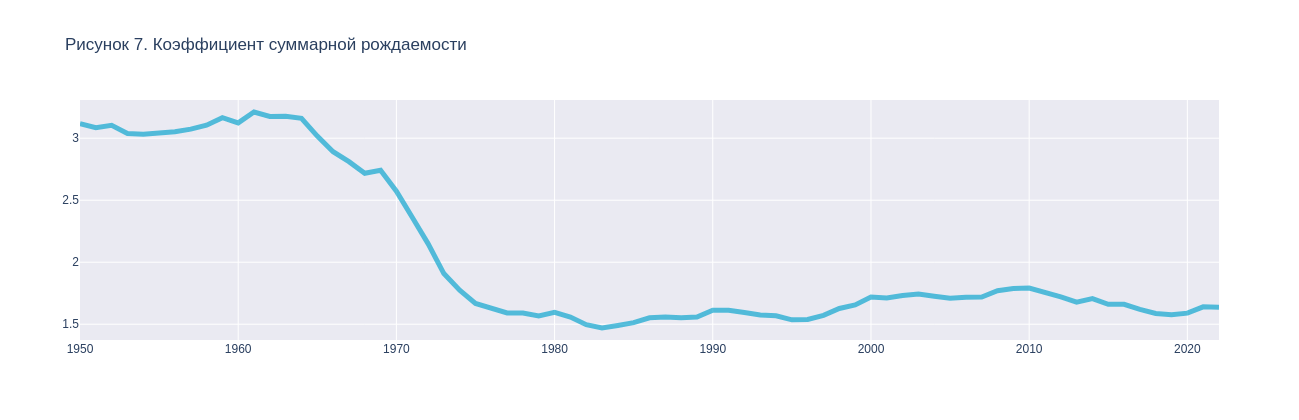

In [328]:
fig = go.Figure()

fig.add_trace(go.Scatter(
    x=df['Time'], 
    y=df[df['ISO3_code'] == 'NLD']['TFR'],
    name = 'Нидерланды',
    line = dict(width=5, color='rgba(0, 161, 205, 0.65)'),
    mode = 'lines',
    marker=dict(color='#87b9c9', opacity=0.65),
    ))

fig.add_trace(go.Scatter(
    x=df['Time'], 
    y=df[df['ISO3_code'] == 'DEU']['TFR'],
    name = 'Германия',
    line = dict(width=5, color='rgba(125, 130, 129, 0.65)'),
    mode = 'lines',
    marker=dict(color='#87b9c9', opacity=0.65),
    ))

fig.add_trace(go.Scatter(
    x=df['Time'], 
    y=df[df['ISO3_code'] == 'BEL']['TFR'],
    name = 'Бельгия',
    line = dict(width=5, color='rgba(138, 45, 62, 0.65)'),
    mode = 'lines',
    marker=dict(color='#87b9c9',opacity=0.65),
    ))


fig.update_layout(
    title='Рисунок 7. Коэффициент суммарной рождаемости',
    autosize=False,
    width=700,
    height=420,
    barmode='group',
    plot_bgcolor='#eaeaf2'
    )

fig.show()
# fig.write_image("tfr.svg")

In [320]:
df = pd.read_csv('wpp.csv', low_memory=False)
df = df[(df['ISO3_code'] == 'NLD')]
df = df[df['Time'] <= 2022]

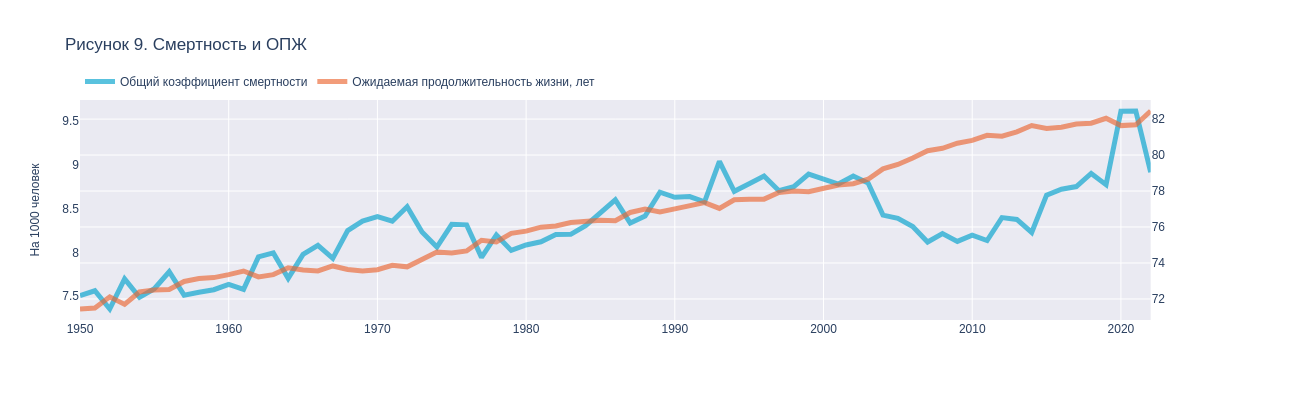

In [336]:
fig = make_subplots(specs=[[{"secondary_y": True}]])

fig.add_trace(go.Scatter(
    x=df['Time'], 
    y=df['CDR'],
    name = 'Общий коэффициент смертности',
    line = dict(width=5, color='rgba(0, 161, 205, 0.65)'),
    mode = 'lines',
    marker=dict(color='#87b9c9',opacity=0.65),
    ), 
    secondary_y=False
    )

fig.add_trace(go.Scatter(
    x=df['Time'], 
    y=df['LEx'],
    name = 'Ожидаемая продолжительность жизни, лет',
    line = dict(width=5, color='rgba(235, 103, 52, 0.65)'),
    mode = 'lines',
    marker=dict(color='#87b9c9',opacity=0.65),
    ), 
    secondary_y=True
    )




layout = go.Layout(
    xaxis=dict(
               title='Год',
               showgrid=False,
               showline=False,
               linewidth=0,
               ticks='outside',
               gridwidth=0,
               gridcolor='rgba(255, 255, 255, 0.9)'
               ),
    yaxis=dict(
               showline=False,
               showgrid=False,
               gridwidth=0,
               linewidth=0,
               gridcolor='rgba(255, 255, 255, 0.9)'
              ),
    )


fig.update_layout(
    title_text='Рисунок 9. Cмертность и ОПЖ',
    autosize=False,
    width=750,
    height=400,
    plot_bgcolor='#eaeaf2',
    legend=dict(
                orientation="h",
                x=0,
                y=1.15,
                font=dict(size=12)
               )
    
    )

fig.update_yaxes(title=dict(text="На 1000 человек", font=dict(size=12)), showgrid=False, secondary_y=False)

fig.show()
fig.write_image("death.svg")